In [1]:
import scarlet
import galsim
from mr_tools import galsim_compare_tools as gct
from astropy import wcs as WCS
import scipy.stats as scs
import pickle
import numpy

In [2]:
%pylab inline
#Loading stuffs
data_dir='/Users/remy/Desktop/LSST_Project/GalSim/examples/data/COSMOS_23.5_training_sample/'

HST, EUCLID, ROMAN, HSC, RUBIN = gct.load_surveys()

cat = galsim.COSMOSCatalog(dir=data_dir, file_name = 'real_galaxy_catalog_23.5.fits')

def mad(x):
    return scs.median_absolute_deviation(x)

npsf = 41

matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

Populating the interactive namespace from numpy and matplotlib


HR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}
LR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}


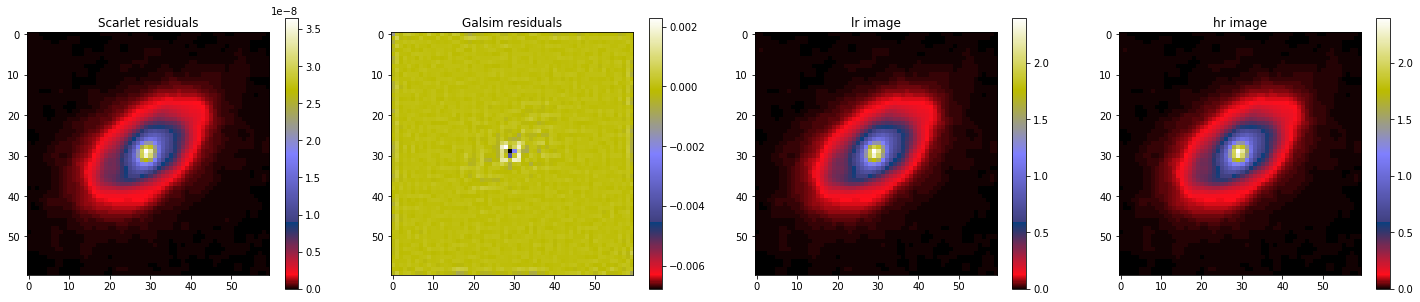

HR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}
LR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}


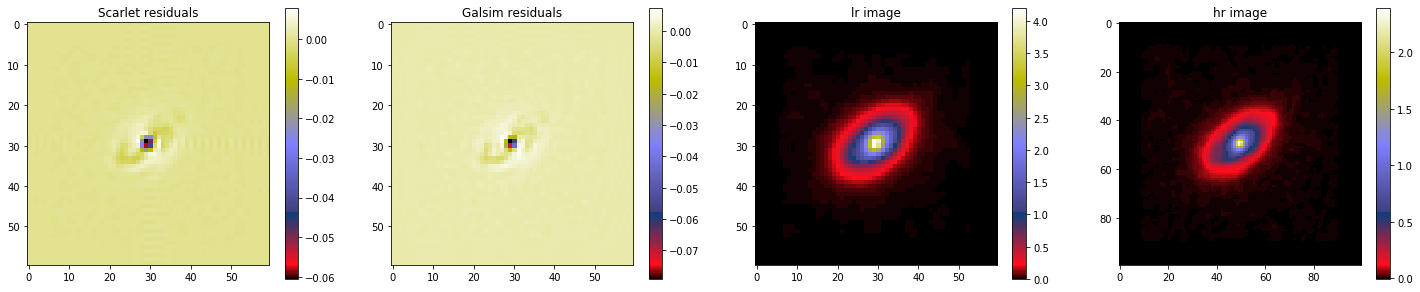

HR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}
LR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}


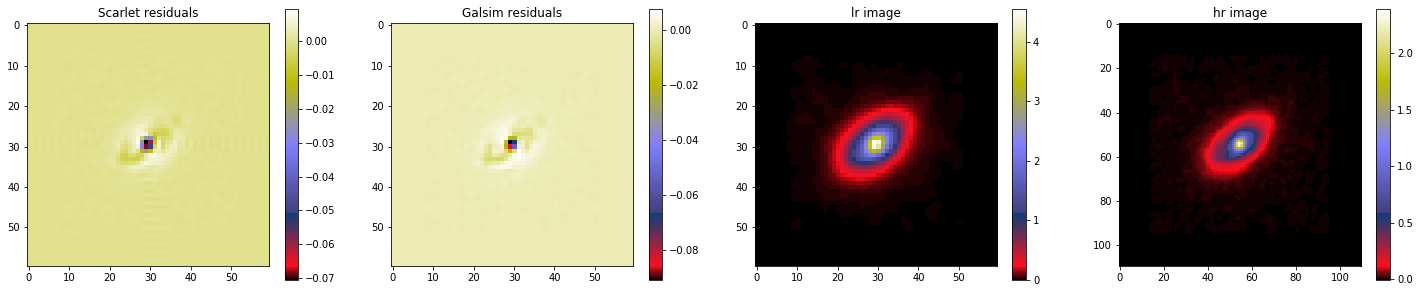

HR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}
LR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}


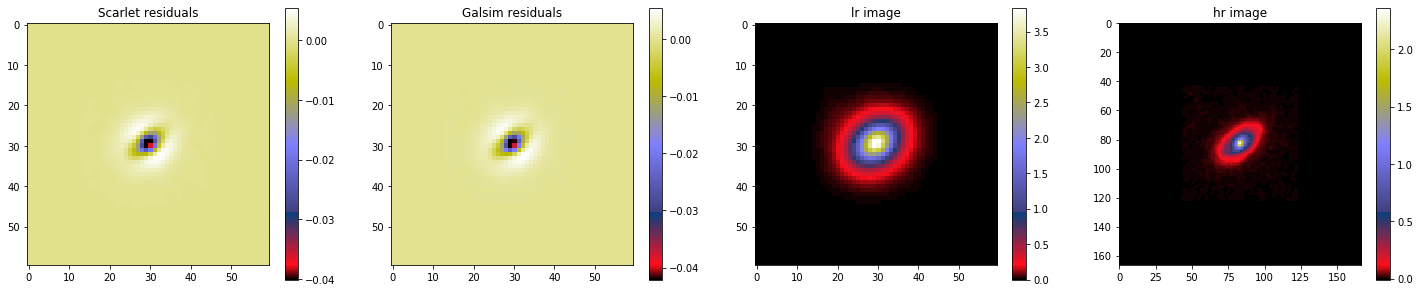

HR {'name': 'HST', 'pixel': 0.06, 'psf': 0.074, 'channels': ['f814w']}
LR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}


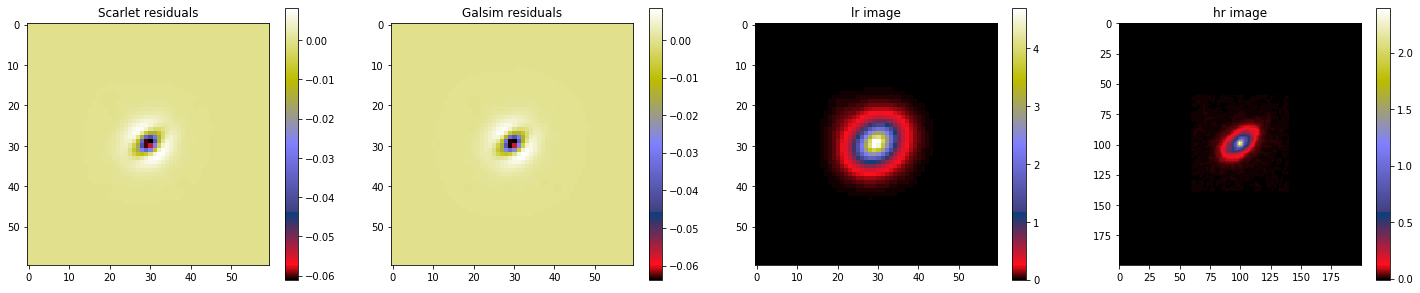

HR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}
LR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}


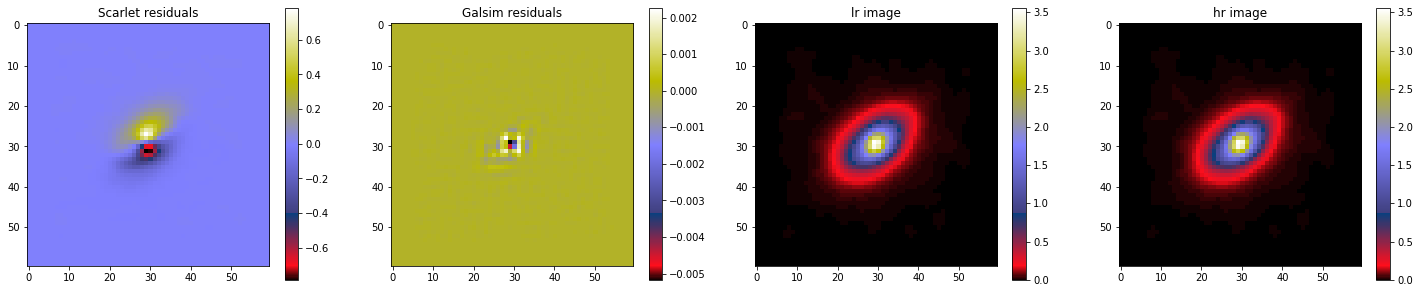

HR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}
LR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}


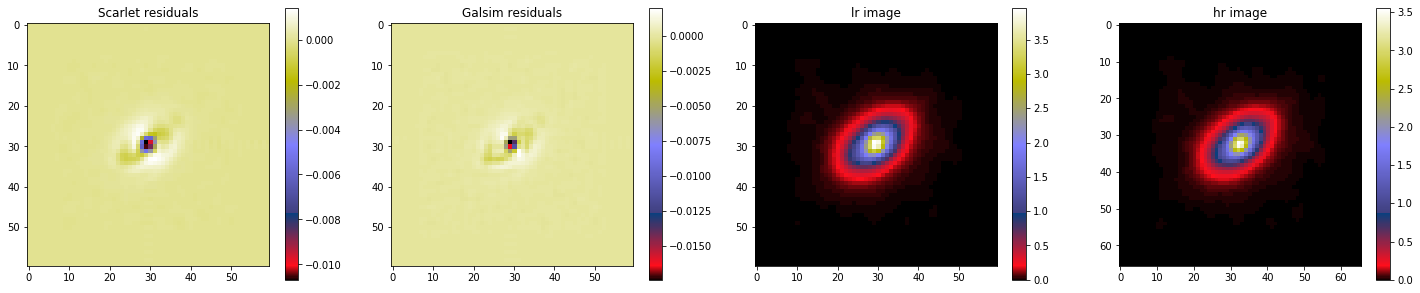

HR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}
LR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}


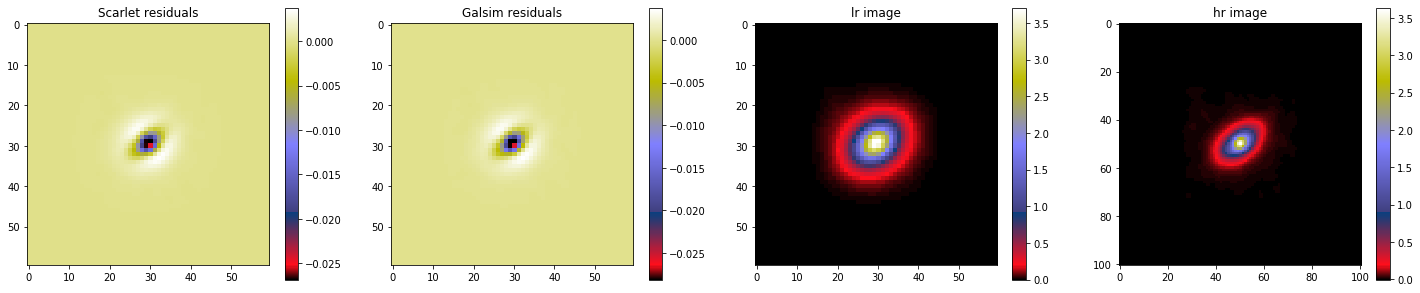

HR {'name': 'EUCLID', 'pixel': 0.1, 'psf': 0.16, 'channels': ['VIS']}
LR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}


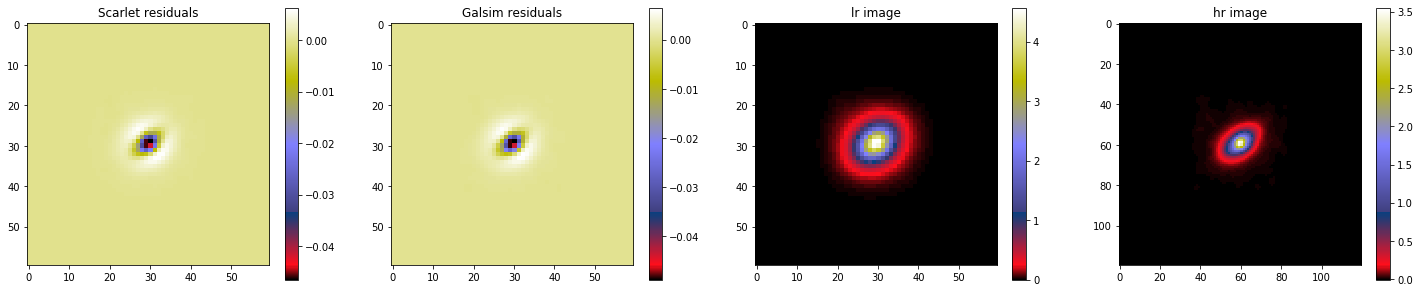

HR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}
LR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}


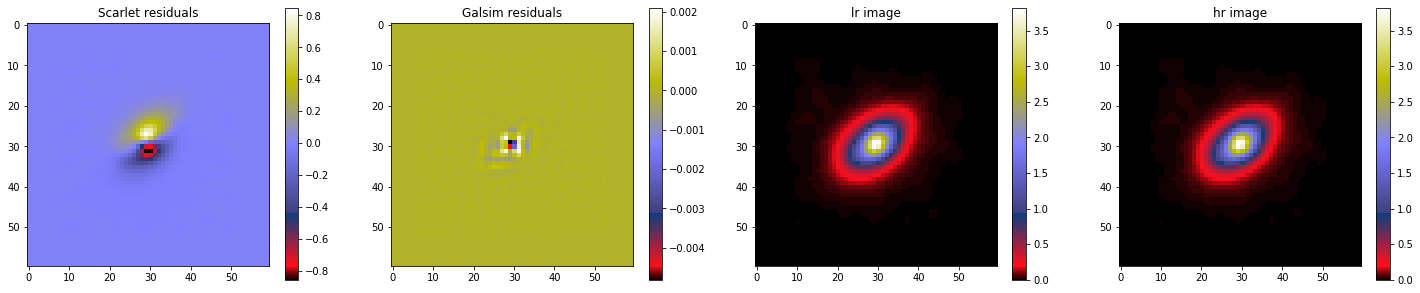

HR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}
LR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}


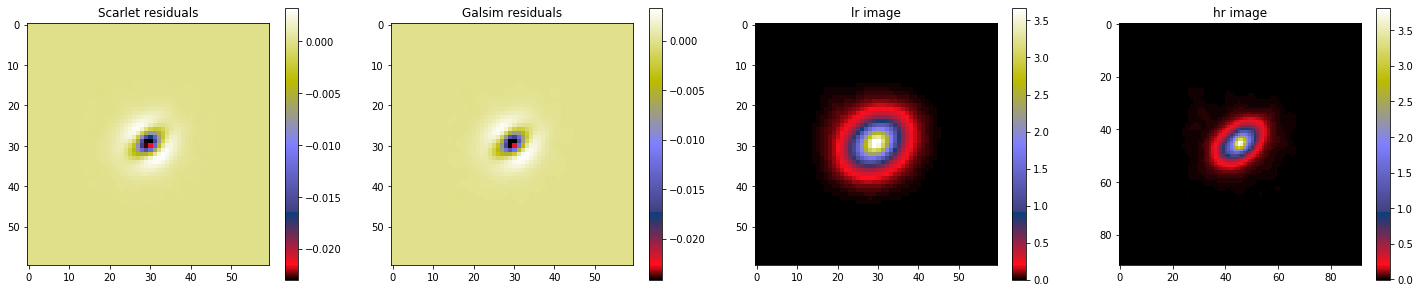

HR {'name': 'ROMAN', 'pixel': 0.11, 'psf': 0.18589999999999998, 'channels': ['R062', 'Z087', 'Y106', 'J129', 'H158', 'F184']}
LR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}


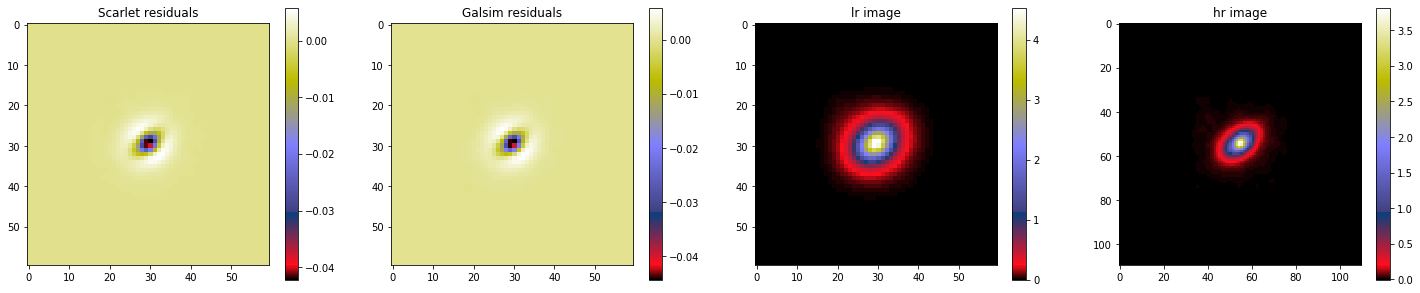

HR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}
LR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}


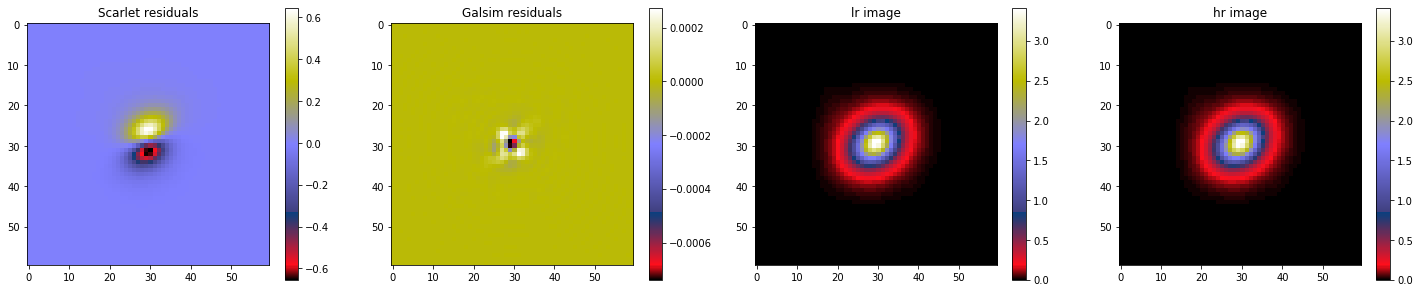

HR {'name': 'HSC', 'pixel': 0.167, 'psf': 0.62, 'channels': ['g', 'r', 'i', 'z', 'y']}
LR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}


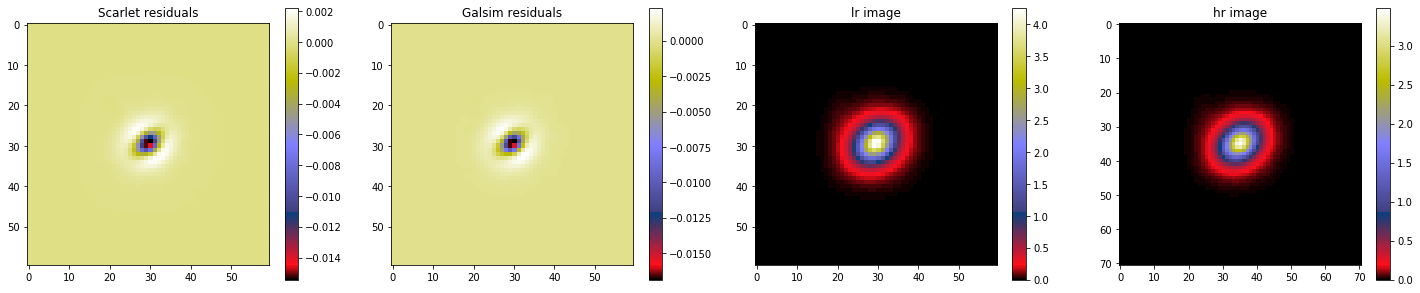

HR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}
LR {'name': 'RUBIN', 'pixel': 0.2, 'psf': 0.7, 'channels': ['u', 'g', 'r', 'i', 'z', 'y']}


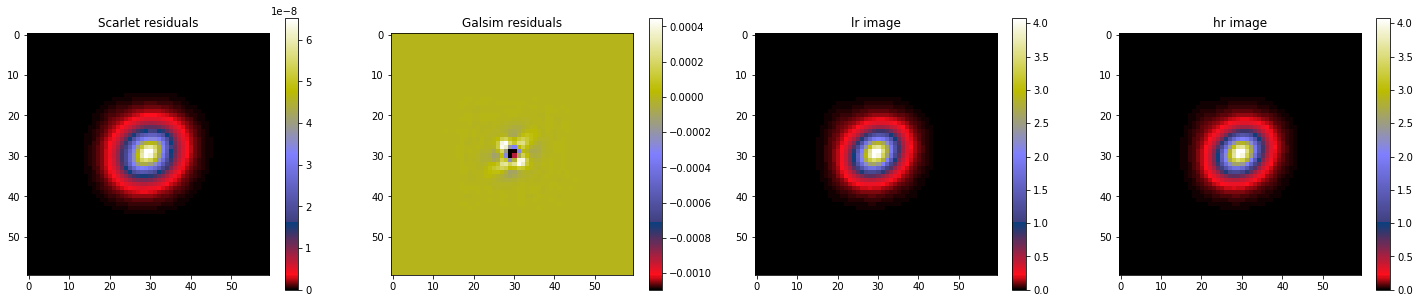

In [3]:
# Shape of the low resolutino images
nlr = 60
# List of surveys
surveys = [HST,EUCLID, ROMAN, HSC, RUBIN]
# Scarlet-specific channels
channel_hr = ['hr']
channel_lr = ['lr']
channels = channel_lr+channel_hr
# Storage for the results
reconstructions = {'survey_lr': [], 'survey_hr': [], 'n_hr': [], 's_sdr': [], 'g_sdr': []}
# PSF size (pixels)


for gg, surveyhr in enumerate(surveys):
    for g, surveylr in enumerate(surveys[gg:]):
        print('HR', surveyhr)
        print('LR', surveylr)
        for i in [0,39]:#range(1000):
            nhr = np.around(nlr*surveylr['pixel']/surveyhr['pixel'], decimals=3)
            if nhr-np.int(nhr) >= 0.5:
                nhr = np.floor(nhr)
            else:
                nhr = np.ceil(nhr)
            # Galsim setup:
            data_hr, data_lr, wcs_hr, wcs_lr, psf_hr, psf_lr, angle, _, _ = gct.mk_sim(int(i), surveyhr, surveylr, (nhr, nhr), 
                                                                 (nlr, nlr), npsf, cat, smooth = True)
            ## GSO from psf_hr for galsim
            psf_hr_galsim = galsim.InterpolatedImage(galsim.Image(psf_hr[0]), 
                                               scale = surveyhr['pixel'], use_true_center = False)
            ## deconvolution kernel for diff kernel
            deconv = galsim.Deconvolve(psf_hr_galsim)
            ## Interpolation of low resolution psf at high resolution
            psf_lr_hr = galsim.InterpolatedImage(galsim.Image(psf_lr[0]), 
                                               scale = surveylr['pixel'], use_true_center = False)
            ## Difference kernel from galsim
            diff_gal = galsim.Convolve(deconv, psf_lr_hr)
            diff = diff_gal.drawImage(nx=npsf,ny=npsf, scale=surveyhr['pixel']).array[None, :,:]

            # scarlet setup
            if i == 0:
                obs_lr, obs_hr = gct.setup_scarlet(data_hr, data_lr, wcs_hr, wcs_lr, psf_hr, psf_lr, channels, 'intersection')

            # Scarlet timing
            scar_rec = obs_lr.render(data_hr[None,:,:])
            # Galsim timing
            gal_rec = gct.interp_galsim(data_hr, data_lr, diff_gal, angle, surveyhr['pixel'], surveylr['pixel'])
        
            if i==39:
                figure(figsize = (25,5))
                subplot(141)
                plt.title('Scarlet residuals')
                imshow((scar_rec[0]-data_lr))
                colorbar()
                subplot(142)
                plt.title('Galsim residuals')
                imshow((gal_rec.array-data_lr))
                colorbar()
                subplot(143)
                plt.title('lr image')
                imshow((data_lr))
                colorbar()
                subplot(144)
                plt.title('hr image')
                imshow((data_hr))
                colorbar()
                show()
            
            reconstructions['survey_lr'].append(surveylr) 
            reconstructions['survey_hr'].append(surveyhr) 
            reconstructions['n_hr'].append(nhr) 
            reconstructions['s_sdr'].append(gct.SDR(data_lr,scar_rec))
            reconstructions['g_sdr'].append(gct.SDR(data_lr,gal_rec.array))
import pickle   
bfile = open('Precision_npsf='+str(npsf)+'.pkl', 'wb')
pickle.dump(reconstructions, bfile)
bfile.close()

In [4]:
reconstructions = pickle.load(open('Precision_npsf='+str(npsf)+'.pkl', 'rb'))

surv_lr = np.array(reconstructions['survey_lr'])
surv_hr = np.array(reconstructions['survey_hr'])
n_hrs = np.array(reconstructions['n_hr'])
s_sdr = np.array(reconstructions['s_sdr'])
g_sdr = np.array(reconstructions['g_sdr'])


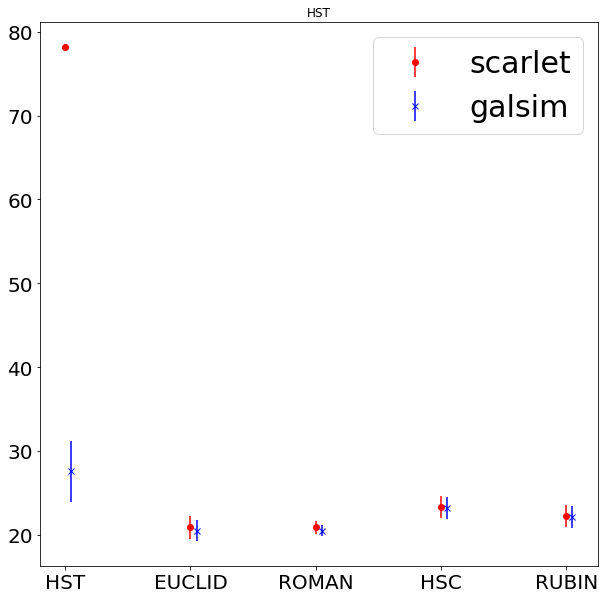

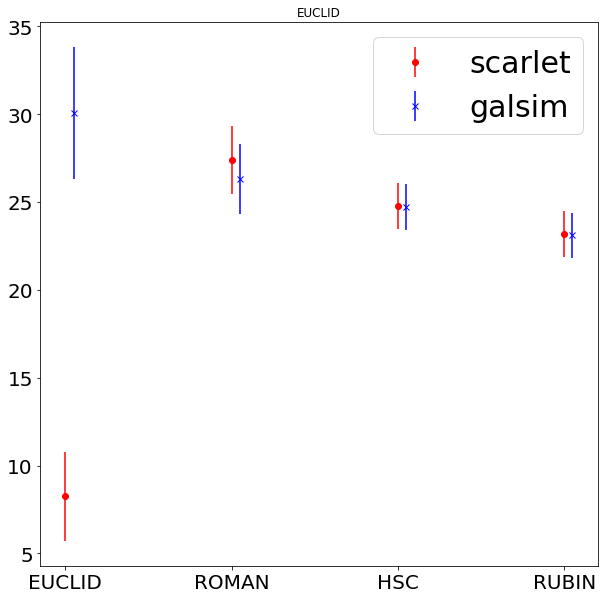

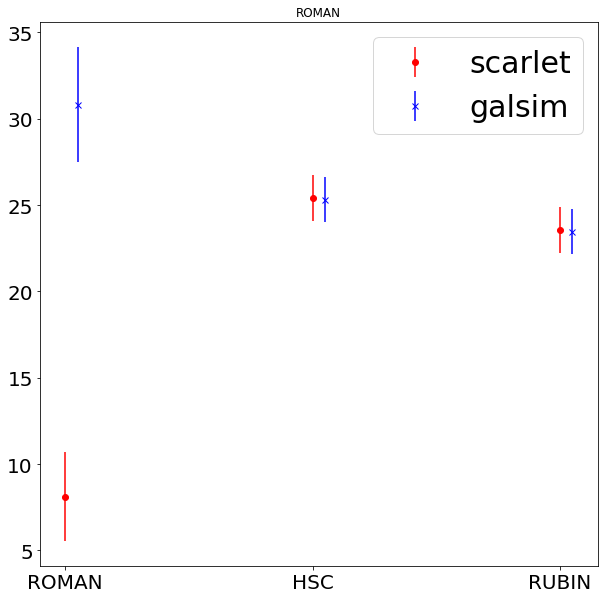

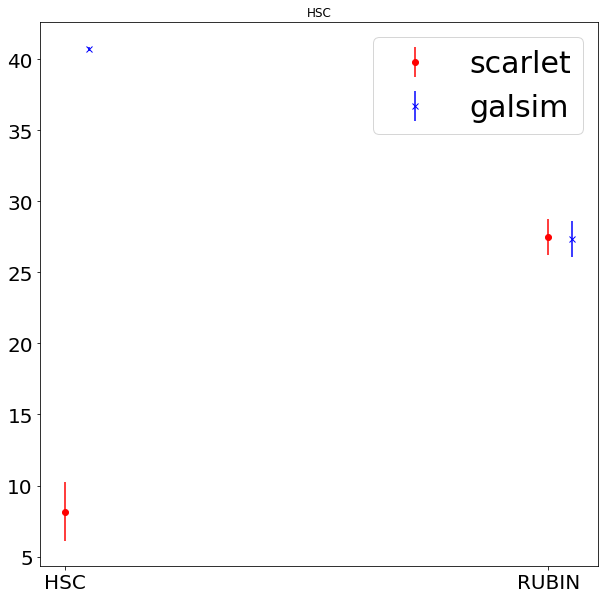

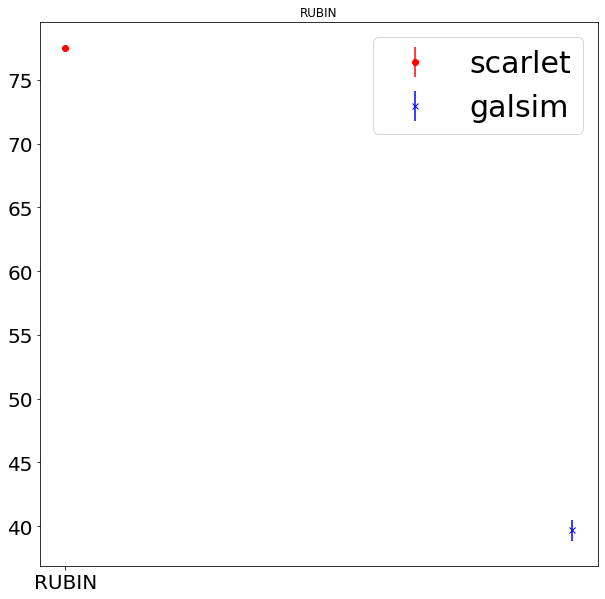

In [5]:
survey_lr = np.array(reconstructions['survey_lr'])
survey_hr = np.array(reconstructions['survey_hr'])
n_hrs = np.array(reconstructions['n_hr'])
s_sdr = np.array(reconstructions['s_sdr'])
g_sdr = np.array(reconstructions['g_sdr'])

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

def plot_sdr(x, condition, label = [None, None]):
    errorbar(x, np.median(s_sdr[condition]), fmt = 'or', label = label[0],
                 yerr = mad(s_sdr[condition]))
    errorbar(x+0.05, np.median(g_sdr[condition]), fmt = 'xb', label = label[1],
                 yerr = mad(g_sdr[condition]))
    pass

s_SDRmatrix = np.zeros((np.size(surveys), np.size(surveys)))
g_SDRmatrix = np.zeros((np.size(surveys), np.size(surveys)))
s_stdmatrix = np.zeros((np.size(surveys), np.size(surveys)))
g_stdmatrix = np.zeros((np.size(surveys), np.size(surveys)))
for e, hr in enumerate(surveys):
    figure(figsize = (10,10))
    plt.title(hr['name'])
    for ee, lr in enumerate(surveys[e:]):
        s_SDRmatrix[e, ee+e] = np.mean(s_sdr[(survey_hr == hr)*(survey_lr == lr)])
        g_SDRmatrix[e, ee+e] = np.mean(g_sdr[(survey_hr == hr)*(survey_lr == lr)])
        s_stdmatrix[e, ee+e] = np.std(s_sdr[(survey_hr == hr)*(survey_lr == lr)])
        g_stdmatrix[e, ee+e] = np.std(g_sdr[(survey_hr == hr)*(survey_lr == lr)])
        if ee == 0:
            plot_sdr(ee,(survey_hr == hr)*(survey_lr == lr), label = ['scarlet', 'galsim'])
        else:
            plot_sdr(ee,(survey_hr == hr)*(survey_lr == lr))
   
    names = [l['name'] for j,l in enumerate(surveys[e:])]
    plt.xticks((np.arange(ee+1)), names)
    legend(fontsize = 30)
    show()
    

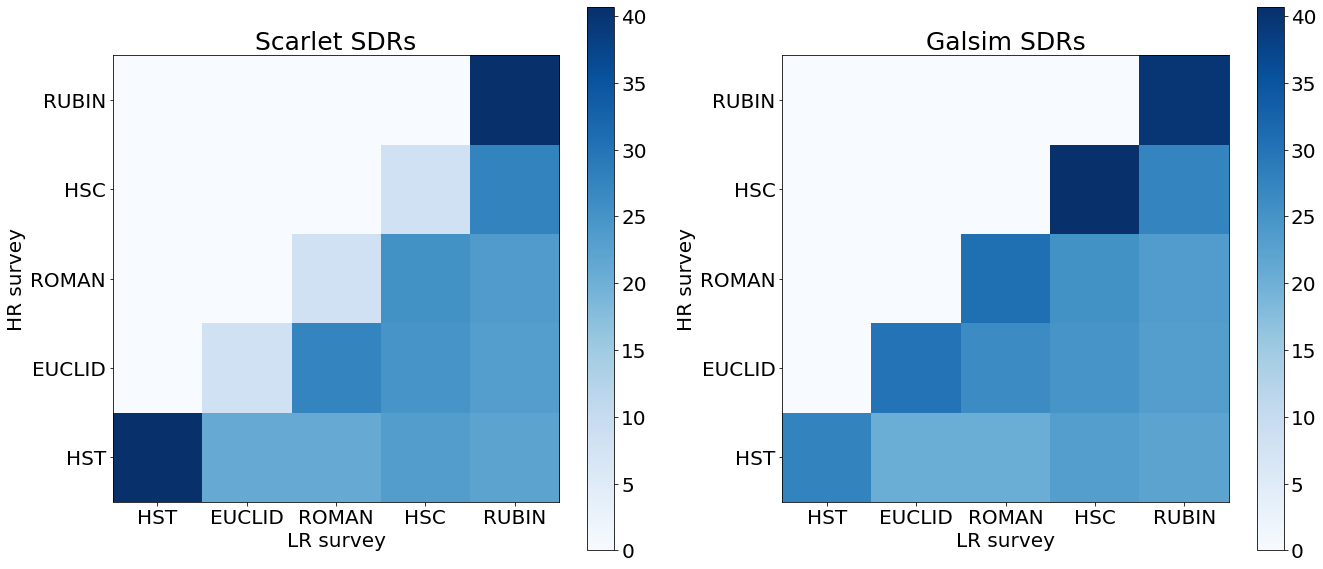

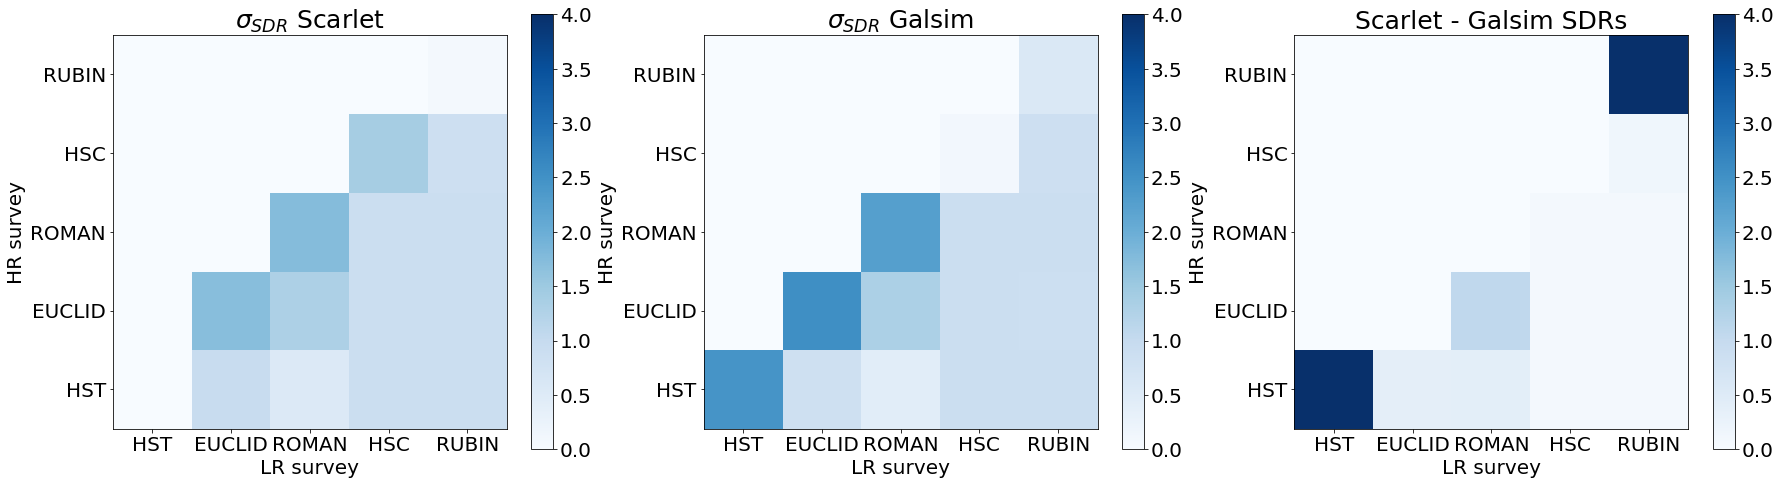

In [6]:
names = [s['name'] for s in surveys]

plt.figure(figsize = (22,10))
plt.subplot(121)
plt.title('Scarlet SDRs', fontsize = 25)
plt.imshow((s_SDRmatrix), vmin = np.min(g_SDRmatrix), vmax = np.max(g_SDRmatrix), cmap = 'Blues', origin = 'lower')
plt.xticks(np.arange(np.size(surveys)), names)
plt.yticks(np.arange(np.size(surveys)), names)
plt.ylabel('HR survey', fontsize = 20)
plt.xlabel('LR survey', fontsize = 20)
plt.colorbar()


plt.subplot(122)
plt.title('Galsim SDRs', fontsize = 25)
plt.imshow(g_SDRmatrix, cmap = 'Blues', origin = 'lower')
plt.xticks(np.arange(np.size(surveys)), names)
plt.yticks(np.arange(np.size(surveys)), names)
plt.ylabel('HR survey', fontsize = 20)
plt.xlabel('LR survey', fontsize = 20)
plt.colorbar()
plt.savefig('SDR_matrix.png')
plt.show()

plt.figure(figsize = (30,8))
plt.subplot(131)
plt.title('$\sigma_{SDR}$ Scarlet', fontsize = 25)
plt.imshow(s_stdmatrix, vmin = 0, vmax = 4, cmap = 'Blues', origin = 'lower')
plt.xticks(np.arange(np.size(surveys)), names)
plt.yticks(np.arange(np.size(surveys)), names)
plt.ylabel('HR survey', fontsize = 20)
plt.xlabel('LR survey', fontsize = 20)
plt.colorbar()

plt.subplot(132)
plt.title('$\sigma_{SDR}$ Galsim', fontsize = 25)
plt.imshow(g_stdmatrix, vmin = 0, vmax = 4, cmap = 'Blues', origin = 'lower')
plt.xticks(np.arange(np.size(surveys)), names)
plt.yticks(np.arange(np.size(surveys)), names)
plt.ylabel('HR survey', fontsize = 20)
plt.xlabel('LR survey', fontsize = 20)
plt.colorbar()

plt.subplot(133)
plt.title('Scarlet - Galsim SDRs', fontsize = 25)
plt.imshow(s_SDRmatrix-g_SDRmatrix, vmin = 0, vmax = 4, cmap = 'Blues', origin = 'lower')
plt.xticks(np.arange(np.size(surveys)), names)
plt.yticks(np.arange(np.size(surveys)), names)
plt.ylabel('HR survey', fontsize = 20)
plt.xlabel('LR survey', fontsize = 20)
plt.colorbar()
plt.savefig('SDR_std.png')
plt.show()